# NAME - SHIKHA ANAND
# CONTACT - 9742292633
# UNID - UMIP282191

# Stock-market Analysis

## Context

Given historical stock price data for Apple, Microsoft, Netflix and Google over the past three months, your task is to analyze and compare the performance of these companies in the stock market using various data science techniques.

Specifically, the goal is to identify trends and patterns in stock price movements,calculate moving averages and volatility for each company, and conduct correlation analysis to examine the relationships between different stock prices.

In [4]:
import os
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv("stocks.csv")

In [8]:
stocks_market_df = dataset
stocks_market_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [10]:
type(stocks_market_df)

pandas.core.frame.DataFrame

In [12]:
stocks_market_df.shape

(248, 8)

Here can view the number of rows (248) and columns (8) in the data frame

Let's view basic information about the data frame.

In [15]:
stocks_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [23]:
stocks_market_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [25]:
stocks_market_df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [27]:
len(stocks_market_df.columns)

8

In [29]:
stocks_market_df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
stocks_market_df.isna()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
243,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False


As we can see in this dataframe there are no missing or incorrect values.

fist let make a copy of data frame to be able to manipulate it.

In [37]:
stocks_market_df = stocks_market_df.copy()
stocks_market_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [39]:
stocks_market_df.Date

0      2023-02-07
1      2023-02-08
2      2023-02-09
3      2023-02-10
4      2023-02-13
          ...    
243    2023-05-01
244    2023-05-02
245    2023-05-03
246    2023-05-04
247    2023-05-05
Name: Date, Length: 248, dtype: object

In [41]:
stocks_market_df['Date'] = pd.to_datetime(stocks_market_df.Date)

In [43]:
stocks_market_df['Date']

0     2023-02-07
1     2023-02-08
2     2023-02-09
3     2023-02-10
4     2023-02-13
         ...    
243   2023-05-01
244   2023-05-02
245   2023-05-03
246   2023-05-04
247   2023-05-05
Name: Date, Length: 248, dtype: datetime64[ns]

In [52]:
stocks_market_df['year'] = pd.DatetimeIndex(stocks_market_df.Date).year
stocks_market_df['month'] = pd.DatetimeIndex(stocks_market_df.Date).month
stocks_market_df['day'] = pd.DatetimeIndex(stocks_market_df.Date).day
stocks_market_df['weekday'] = pd.DatetimeIndex(stocks_market_df.Date).weekday 


In [54]:
stocks_market_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2023,2,7,1
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2023,2,8,2
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2023,2,9,3
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2023,2,10,4
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2023,2,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,2023,5,1,0
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,2023,5,2,1
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,2023,5,3,2
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,2023,5,4,3


In [56]:
Close_market = stocks_market_df[['Ticker', 'Close','Adj Close','Volume', 'year', 'month', 'day', 'weekday']]
Close_market

,Ticker,Close,Adj Close,Volume,year,month,day,weekday
0,AAPL,154.649994,154.414230,83322600,2023,2,7,1
1,AAPL,151.919998,151.688400,64120100,2023,2,8,2
2,AAPL,150.869995,150.639999,56007100,2023,2,9,3
3,AAPL,151.009995,151.009995,57450700,2023,2,10,4
4,AAPL,153.850006,153.850006,62199000,2023,2,13,0
...,...,...,...,...,...,...,...,...
243,GOOG,107.709999,107.709999,20926300,2023,5,1,0
244,GOOG,105.980003,105.980003,20343100,2023,5,2,1
245,GOOG,106.120003,106.120003,17116300,2023,5,3,2
246,GOOG,105.209999,105.209999,19780600,2023,5,4,3


In [58]:
close_market_df = Close_market[Close_market.weekday == 4]
close_market_df

,Ticker,Close,Adj Close,Volume,year,month,day,weekday
3,AAPL,151.009995,151.009995,57450700,2023,2,10,4
8,AAPL,152.550003,152.550003,59144100,2023,2,17,4
12,AAPL,146.710007,146.710007,55469600,2023,2,24,4
17,AAPL,151.029999,151.029999,70732300,2023,3,3,4
22,AAPL,148.500000,148.500000,68572400,2023,3,10,4
27,AAPL,155.000000,155.000000,98944600,2023,3,17,4
32,AAPL,160.250000,160.250000,59196500,2023,3,24,4
37,AAPL,164.899994,164.899994,68749800,2023,3,31,4
46,AAPL,165.210007,165.210007,49386500,2023,4,14,4
51,AAPL,165.020004,165.020004,58337300,2023,4,21,4


The 4 weekday of the week is chosen because when the days are generated, it starts at 0 like all the lists, so the 4 would really be the 5th, that is, Fridays.

Having manipulated the dataframe with the dates can be useful to manipulate the dataframe and obtain more specific information

# Exploratory Analysis and Visualization

Now we are going to create visualizations of the data frames to have a better idea of the data and to be able to understand some of the variables that are representative in this data frame such as the opening price, the closing price, and the volume to understand its performance. in 2023 and be able to find interesting information.

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [73]:
import numpy as np

In [75]:
#Let's calculate the average of the market volume.
average_volume = stocks_market_df['Volume'].mean()
average_volume

32082104.032258064

In [77]:
#Let's calculate the average of the market low.
average_market_low = stocks_market_df['Low'].mean() 
average_market_low

212.697451560728

In [92]:
#Let's calculate the average of the market high.
average_market_hight = stocks_market_df['High'].mean() 
average_market_hight

217.91966176802111

In [94]:
#Let's calculate the range of the market volume.
max_volume = stocks_market_df['Volume'].max()
max_volume 

113316400

In [96]:
min_volume = stocks_market_df['Volume'].min()
min_volume

2657900

In [98]:
volume_range = max_volume - min_volume
volume_range

110658500

In [100]:
#Let's calculate the total of the market volumen in this dataset.
total_volume = stocks_market_df['Volume'].sum()
total_volume

7956361800

In [103]:
#Let's calculate the standard deviation of the close market
std_close = stocks_market_df['Close'].std()
std_close

91.46198942522508

In [107]:
#Let's calculate the standard deviation of the hight market
std_hight_market = stocks_market_df['High'].std()
std_hight_market

92.86302274579451

In [109]:
#Let's calculate the standard deviation of the low market.
std_low_market = stocks_market_df['Low'].std()
std_low_market

90.14788059517089

Let's see the total volume of all trades by company¶
To know the total of the volume we will use the groupby data frame methods to create a new data set to add for each row of each Ticker grouping them with the volume column and add the total of all the values in volume for each Ticker.

In [114]:
total_volume_market_df = stocks_market_df.groupby('Ticker')[['Volume']].sum()
total_volume_market_df

,Volume
Ticker,
AAPL,3737543400
GOOG,1904973100
MSFT,1912597900
NFLX,401247400


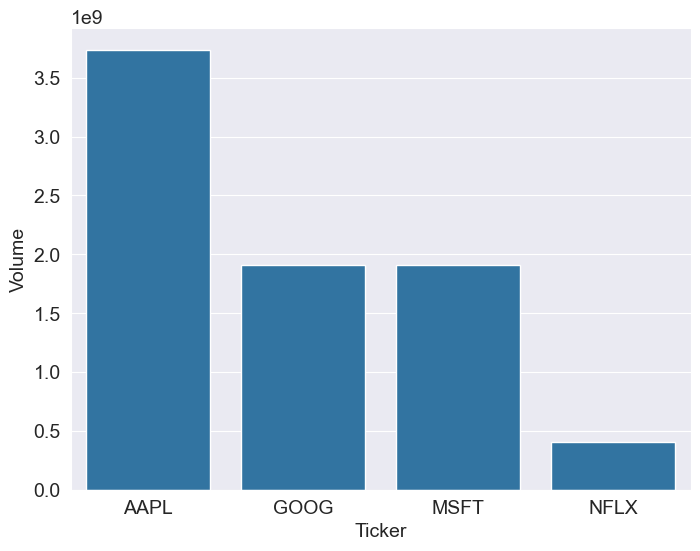

In [126]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Ticker", y="Volume", data=total_volume_market_df)
plt.show()

We can see in this graph the total of the operations volume for each company.

Let's look at the average closing share price by company.
For this, we will create a new dataset with the same groupby method and group the values in the Close column by each company in each Ticker row and obtain the average by the mean() method.

In [129]:
average_stocks_market = stocks_market_df.groupby('Ticker')[['Close']].mean()
average_stocks_market

,Close
Ticker,
AAPL,158.240645
GOOG,100.631532
MSFT,275.039839
NFLX,327.614677


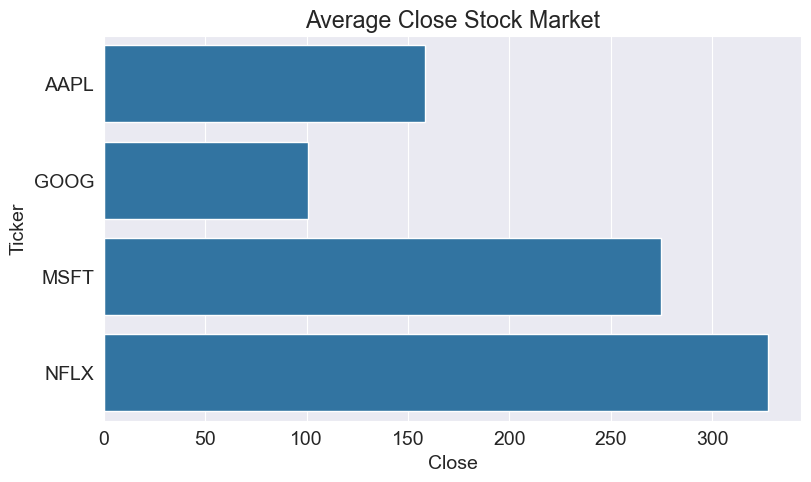

In [133]:
plt.title('Average Close Stock Market')
sns.barplot(x='Close', y=average_stocks_market.index, data=average_stocks_market)
plt.show()

As we can see that the average of the operations with the highest closing price is netflix, however in the previous graph I see that netflix had a lower total in total volume followed by Microsoft, however it had a greater movement in the closing price .

Let's see what the effect of the average opening price versus the closing price would look like.
To do this we will use the groupby method again, grouping the values of the Open column by the Ticker of each company for each one and we will take the average with the mean() method.

In [142]:
op = stocks_market_df.groupby('Ticker')[['Open']].mean()
Op_close_stocks_market = op.merge(average_stocks_market, on='Ticker')
Op_close_stocks_market

,Open,Close
Ticker,,
AAPL,157.779839,158.240645
GOOG,100.381919,100.631532
MSFT,274.735969,275.039839
NFLX,328.110643,327.614677


we are going to see it graphically using seaborn to see the data more clearly.

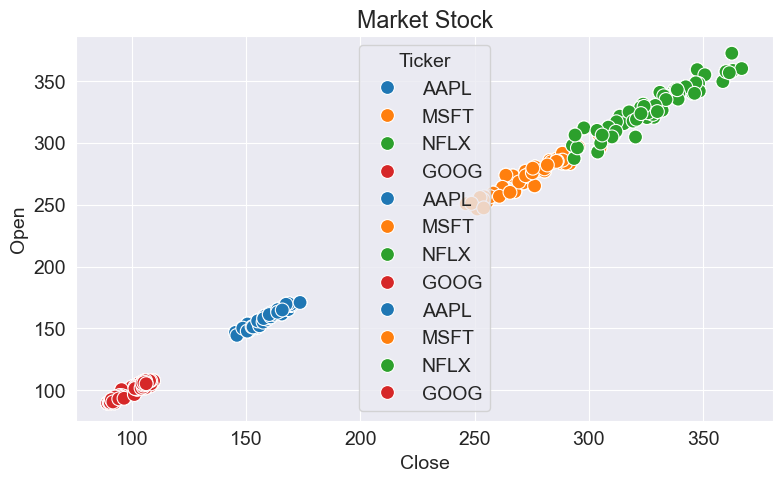

In [151]:
plt.title('Market Stock')
sns.scatterplot(x = stocks_market_df.Close,
                y = stocks_market_df.Open,
                hue=stocks_market_df.Ticker,
                s=100)
plt.show()

In this graph we can see that Netfix is the one that in relation to the opening and closing of the market presents the greatest relationship.

Now let's look at the relationship between the average high price and the low price between Apple, Microsoft, Google, and Netfix.
We are going to see it graphically using seaborn scatterplot to see the relationship the High and Low price for each company.

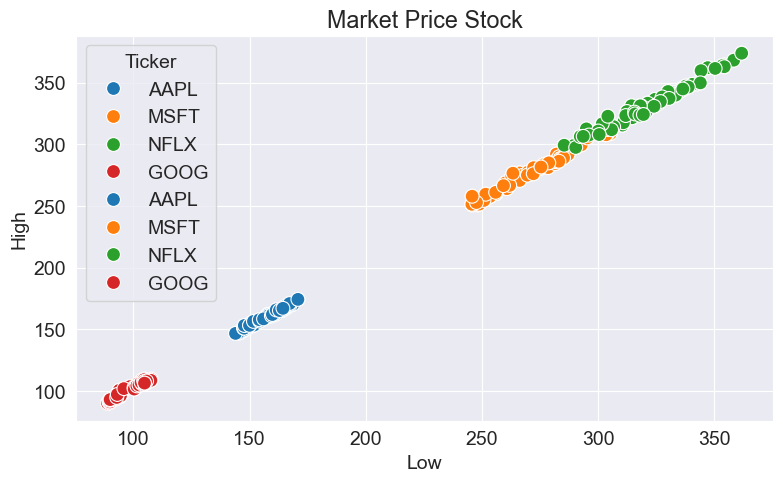

In [156]:
plt.title('Market Price Stock')
sns.scatterplot(x = stocks_market_df.Low,
                y = stocks_market_df.High,
                hue=stocks_market_df.Ticker,
                s=100)
plt.show()

In this graph we can see that Netfix is the one that in relation to the hight price and low price of the market presents the greatest relationship.
    

As we can see, there is a very close relationship between the opening price vs. the closing price and the average of the minimum price and the maximum price since in both graphs we see a similar distribution.

    
Analysis of the dataframe through questions
Ok, so we've already seen some stock data from tech companies Apple, Microsoft, Netflix, and Goggle, now we're going to ask some questions and try to answer them using data frame visualizations and operations.

After having graphed the different components of our data frame, we are going to examine it in greater depth and build information that can help shed more light on it and be able to use it conveniently.

In [159]:
stocks_market_df.loc[stocks_market_df.month == 1 , 'month'] = 'Jan'
stocks_market_df.loc[stocks_market_df.month == 2 , 'month'] = 'Feb'
stocks_market_df.loc[stocks_market_df.month == 3 , 'month'] = 'Mar'
stocks_market_df.loc[stocks_market_df.month == 4 , 'month'] = 'Apr'
stocks_market_df.loc[stocks_market_df.month == 5 , 'month'] = 'May'
stocks_market_df.loc[stocks_market_df.month == 6 , 'month'] = 'Jun'
stocks_market_df.loc[stocks_market_df.month == 7 , 'month'] = 'Jul'
stocks_market_df.loc[stocks_market_df.month == 8 , 'month'] = 'Aug'
stocks_market_df.loc[stocks_market_df.month == 9 , 'month'] = 'Sept'
stocks_market_df.loc[stocks_market_df.month == 10 ,'month'] = 'Oct'
stocks_market_df.loc[stocks_market_df.month == 11 ,'momth'] = 'Nov'
stocks_market_df.loc[stocks_market_df.month == 12 ,'month'] = 'Dec'
stocks_market = stocks_market_df.drop(stocks_market_df.columns[12], axis=1)
stocks_market

C:\Users\shikh\AppData\Local\Temp\ipykernel_29376\581094576.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Jan' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  stocks_market_df.loc[stocks_market_df.month == 1 , 'month'] = 'Jan'


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2023,Feb,7,1
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2023,Feb,8,2
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2023,Feb,9,3
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2023,Feb,10,4
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2023,Feb,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,2023,May,1,0
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,2023,May,2,1
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,2023,May,3,2
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,2023,May,4,3


Observation: although in this dataframe it only goes up to the month of May, we wanted to go up to the month of December in the event that this data continues to crystallize during the rest of the year, we can use it.

Now we are going to decompose the selected dataframe separately, the 4 companies that make up this dataframe, creating a dataframe for each one, so that we can analyze each one in a better way

In [164]:
Apple_stock_market = stocks_market[stocks_market['Ticker'] == 'AAPL']
Apple_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2023,Feb,7,1
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2023,Feb,8,2
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2023,Feb,9,3
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2023,Feb,10,4
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2023,Feb,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,AAPL,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,2023,May,1,0
58,AAPL,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,2023,May,2,1
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,2023,May,3,2
60,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400,2023,May,4,3


In [166]:
Microsoft_stock_market = stocks_market[stocks_market['Ticker'] == 'MSFT']
Microsoft_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
62,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,2023,Feb,7,1
63,MSFT,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000,2023,Feb,8,2
64,MSFT,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100,2023,Feb,9,3
65,MSFT,2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25818500,2023,Feb,10,4
66,MSFT,2023-02-13,267.640015,274.600006,267.149994,271.320007,270.642120,44630900,2023,Feb,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,MSFT,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100,2023,May,1,0
120,MSFT,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400,2023,May,2,1
121,MSFT,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800,2023,May,3,2
122,MSFT,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900,2023,May,4,3


In [182]:
Netflix_stock_market = stocks_market[stocks_market['Ticker'] == 'NFLX']
Netflix_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
124,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,2023,Feb,7,1
125,NFLX,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200,2023,Feb,8,2
126,NFLX,2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100,2023,Feb,9,3
127,NFLX,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100,2023,Feb,10,4
128,NFLX,2023-02-13,349.500000,359.700012,344.250000,358.570007,358.570007,7134400,2023,Feb,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
181,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500,2023,May,1,0
182,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600,2023,May,2,1
183,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100,2023,May,3,2
184,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,2023,May,4,3


In [184]:
Google_stock_market =  stocks_market[stocks_market['Ticker'] == 'GOOG']
Google_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,2023,Feb,7,1
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,2023,Feb,8,2
188,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,2023,Feb,9,3
189,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300,2023,Feb,10,4
190,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,2023,Feb,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,2023,May,1,0
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,2023,May,2,1
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,2023,May,3,2
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,2023,May,4,3


### What was the moving average of the stock prices of Apple, Microsoft, Netflix, and Apple?

In [188]:
Apple_close_market = Apple_stock_market[['Date','Adj Close']].copy()
Apple_close_market['SMA for 10 days'] = Apple_stock_market['Adj Close'].rolling(10).mean()
Apple_close_market

,Date,Adj Close,SMA for 10 days
0,2023-02-07,154.414230,NaN
1,2023-02-08,151.688400,NaN
2,2023-02-09,150.639999,NaN
3,2023-02-10,151.009995,NaN
4,2023-02-13,153.850006,NaN
...,...,...,...
57,2023-05-01,169.589996,166.631000
58,2023-05-02,168.539993,166.837999
59,2023-05-03,167.449997,166.819998
60,2023-05-04,165.789993,166.733998


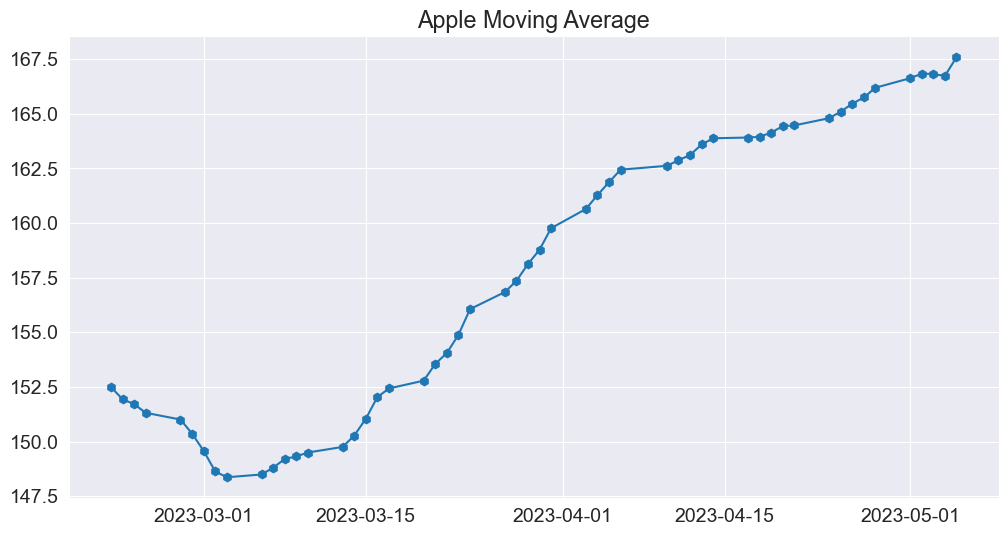

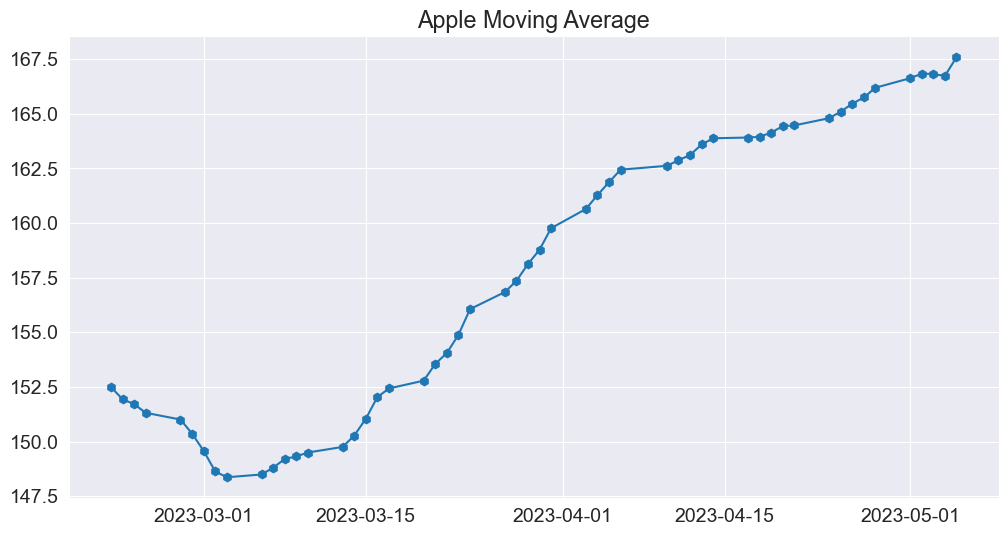

In [192]:
plt.figure(figsize=(12,6))
plt.plot(Apple_close_market['Date'], Apple_close_market['SMA for 10 days'], marker='h')
plt.title('Apple Moving Average')
plt.show()

As we can see in this graph, except for the first half of March when the share price fell in a general sense before an upward trend.

Now we will continue with the other companies using the same code.

In [195]:
Microsoft_close_market = Microsoft_stock_market[['Date','Adj Close']].copy()
Microsoft_close_market['SMA for 10 days'] = Microsoft_stock_market['Adj Close'].rolling(10).mean()
Microsoft_close_market

,Date,Adj Close,SMA for 10 days
62,2023-02-07,266.891510,NaN
63,2023-02-08,266.063599,NaN
64,2023-02-09,262.961365,NaN
65,2023-02-10,262.442657,NaN
66,2023-02-13,270.642120,NaN
...,...,...,...
119,2023-05-01,305.559998,291.889999
120,2023-05-02,305.410004,293.594000
121,2023-05-03,304.399994,295.188998
122,2023-05-04,305.410004,297.119000


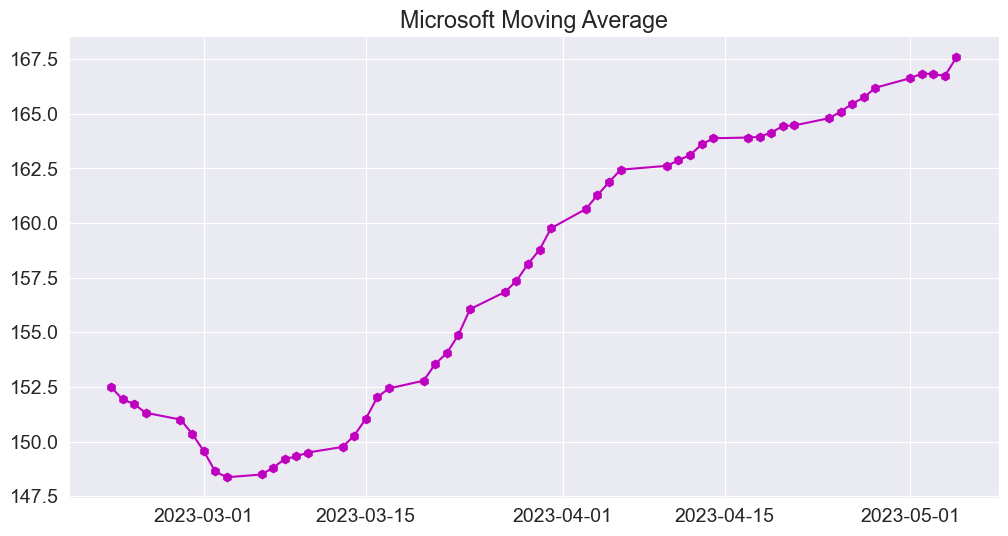

In [197]:
plt.figure(figsize=(12,6))
plt.plot(Microsoft_close_market['Date'], Apple_close_market['SMA for 10 days'], marker='h', color='m')
plt.title('Microsoft Moving Average')
plt.show()

As we can see in this graph, except for the first half of March when the share price fell in a general sense before an upward trend, very similar to Apple.

In [200]:
Netflix_close_market = Netflix_stock_market[['Date','Adj Close']].copy()
Netflix_close_market['SMA for 10 days'] = Netflix_stock_market['Adj Close'].rolling(10).mean()
Netflix_close_market

,Date,Adj Close,SMA for 10 days
124,2023-02-07,362.950012,NaN
125,2023-02-08,366.829987,NaN
126,2023-02-09,362.500000,NaN
127,2023-02-10,347.359985,NaN
128,2023-02-13,358.570007,NaN
...,...,...,...
181,2023-05-01,324.119995,326.276999
182,2023-05-02,317.549988,324.661996
183,2023-05-03,319.299988,324.279996
184,2023-05-04,320.779999,323.822995


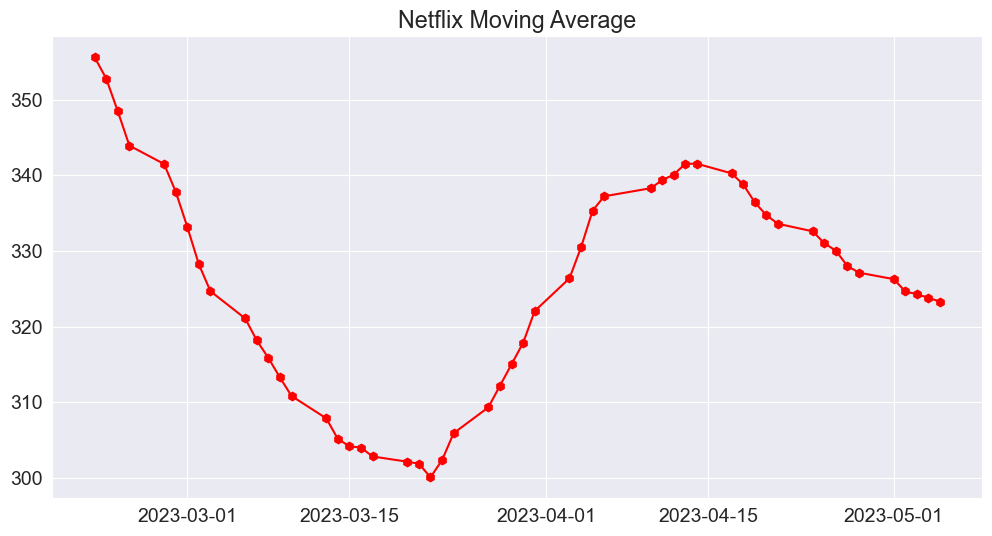

In [202]:
plt.figure(figsize=(12,6))
plt.plot(Netflix_close_market['Date'], Netflix_close_market['SMA for 10 days'], marker='h', color='r')
plt.title('Netflix Moving Average')
plt.show()

In [204]:
Google_close_market = Google_stock_market[['Date','Adj Close']].copy()
Google_close_market['SMA for 10 days'] = Google_stock_market['Adj Close'].rolling(10).mean()
Google_close_market

,Date,Adj Close,SMA for 10 days
186,2023-02-07,108.040001,NaN
187,2023-02-08,100.000000,NaN
188,2023-02-09,95.459999,NaN
189,2023-02-10,94.860001,NaN
190,2023-02-13,95.000000,NaN
...,...,...,...
243,2023-05-01,107.709999,106.209000
244,2023-05-02,105.980003,106.295000
245,2023-05-03,106.120003,106.405001
246,2023-05-04,105.209999,106.336001


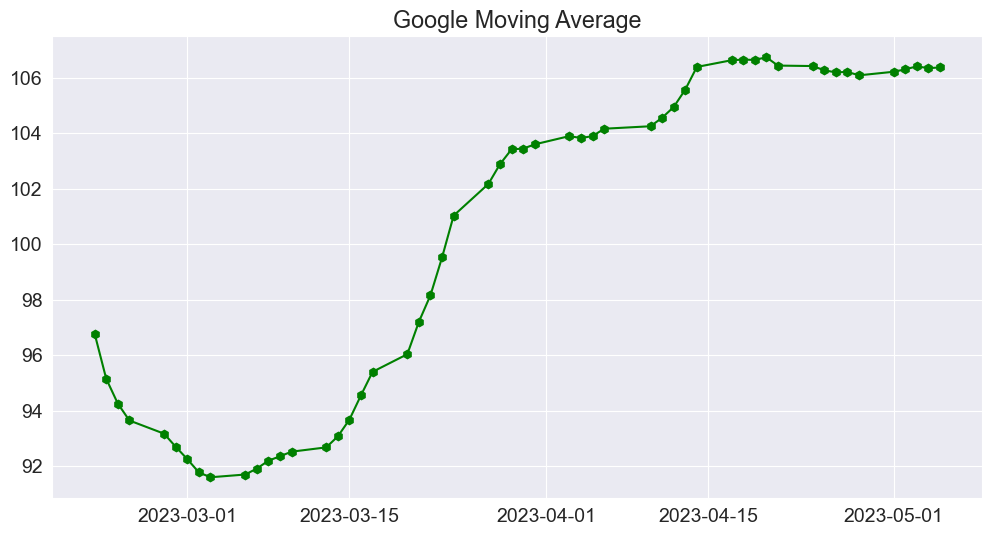

In [206]:
plt.figure(figsize=(12,6))
plt.plot(Google_close_market['Date'], Google_close_market['SMA for 10 days'], marker='h', color='g')
plt.title('Google Moving Average')
plt.show()

In this graph we can see that from February to March it had a downward trend, reaching its resistance point in the first half of March and then recovering with an upward trend.

Now, why calculate the moving average? This statistical measure is used to identify support and resistance levels during price fluctuations in a given period of time.

If we use the moving average as an indicator so that opportunity to buy can be identified, the price tends to be above the moving average

### What would be the correlation between the closing price returns between the different stocks of all the companies?

In [210]:
r= Apple_stock_market[['Date','Adj Close']]
rr = r.rename(columns={'Adj Close': 'Apple Close'}) 
s= Microsoft_stock_market[['Date', 'Adj Close']]
sr = s.rename(columns={'Adj Close': ' Microsoft Close'})
rs = rr.merge(sr, on='Date')
t = Netflix_stock_market[['Date','Adj Close']]
tr = t.rename(columns={'Adj Close': 'Netflix Close'})
rst = tr.merge(rs, on='Date')
e = Google_stock_market[['Date','Adj Close']]
er = e.rename(columns={'Adj Close': 'Google Close'})
rste = er.merge(rst, on='Date')
rste

,Date,Google Close,Netflix Close,Apple Close,Microsoft Close
0,2023-02-07,108.040001,362.950012,154.414230,266.891510
1,2023-02-08,100.000000,366.829987,151.688400,266.063599
2,2023-02-09,95.459999,362.500000,150.639999,262.961365
3,2023-02-10,94.860001,347.359985,151.009995,262.442657
4,2023-02-13,95.000000,358.570007,153.850006,270.642120
...,...,...,...,...,...
57,2023-05-01,107.709999,324.119995,169.589996,305.559998
58,2023-05-02,105.980003,317.549988,168.539993,305.410004
59,2023-05-03,106.120003,319.299988,167.449997,304.399994
60,2023-05-04,105.209999,320.779999,165.789993,305.410004


In [216]:
rste.corr(method='pearson')

,Date,Google Close,Netflix Close,Apple Close,Microsoft Close
Date,1.000000,0.767461,-0.206961,0.888577,0.845661
Google Close,0.767461,1.000000,0.201046,0.900405,0.884590
Netflix Close,-0.206961,0.201046,1.000000,0.151178,0.184535
Apple Close,0.888577,0.900405,0.151178,1.000000,0.953977
Microsoft Close,0.845661,0.884590,0.184535,0.953977,1.000000


se the Pandas df.corr() function to find the correlation between the columns in the data frame using the 'pearson' method. The output data frame is an array that can be interpreted as for any cell, the row variable's assignment to the column variable is the cell's value. As mentioned above, the correlation of a variable with itself is 1, but when the correlation is with other variables, it varies.

So how to interpret it, when the correlation between different variables is negative it means that the correlation between those variables is negative, when it is zero it means that the correlation is null, but when it exceeds (1.) it is when there is no correlation, the higher it is the number after (1.), the greater the correlation between those variables

Now let's use the Seaborn library to plot a heat map and visualize the correlations in a better way.

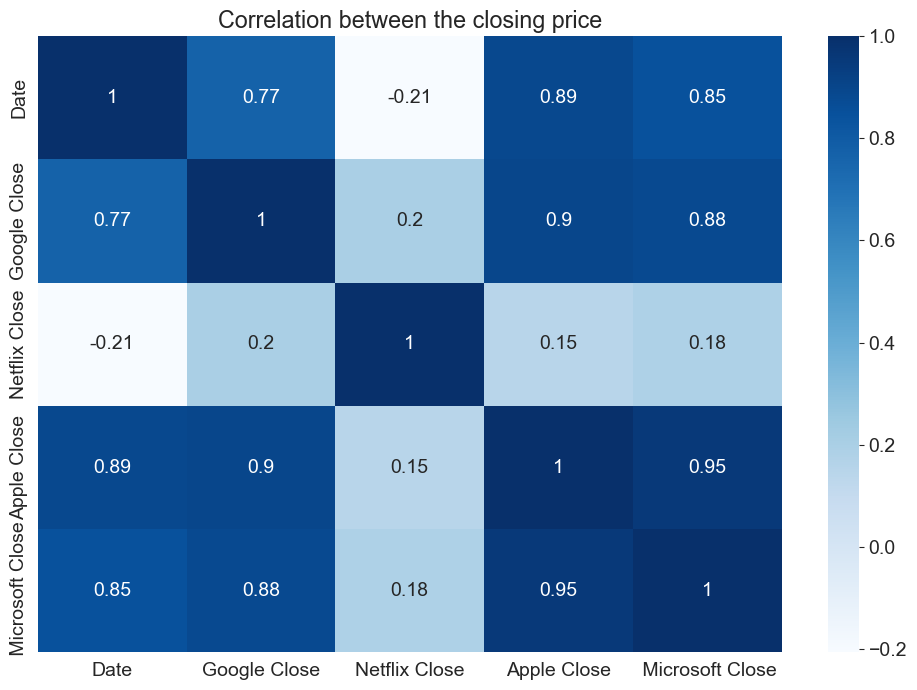

In [219]:
plt.figure(figsize=(12,8))
plt.title('Correlation between the closing price')
sns.heatmap(rste.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

As we can see, the actions that present the greatest correlation in terms of closing are Apple with Microsoft, which presents a correlation of 0.95, followed by Google with Apple (0.9) and Microsort with a correlation of 0.88. Netflix's actions is that it does not present any correlation or a very low one with the others.

### What would be the correlation between the closing price returns of the shares and the trading volume of the companies?

In [225]:
close_volume_apple = Apple_stock_market.set_index('Date')[['Adj Close','Volume']]
close_volume_apple 

,Adj Close,Volume
Date,,
2023-02-07,154.414230,83322600
2023-02-08,151.688400,64120100
2023-02-09,150.639999,56007100
2023-02-10,151.009995,57450700
2023-02-13,153.850006,62199000
...,...,...
2023-05-01,169.589996,52472900
2023-05-02,168.539993,48425700
2023-05-03,167.449997,65136000


In [227]:
close_volume_apple_corr = close_volume_apple.corr()
close_volume_apple_corr

,Adj Close,Volume
Adj Close,1.000000,-0.057066
Volume,-0.057066,1.000000


We get -0.057 as the correlation between the scores of Adj Close and Volume. This indicates that the two columns highly correlated in a negative direction.

Seaborn regplot method is used to plot data showing a moving regression line and shows us the relationship between two numerical variables, draw a Scatterplot of two variables, x and y, and then fit the regression model y ~ x; and plot the resulting regression line and a 95% confidence interval for that regression.in this case we plot the relationship between volume and closing share price.

Now we are going to plot it using the regplot method to see it more clearly.

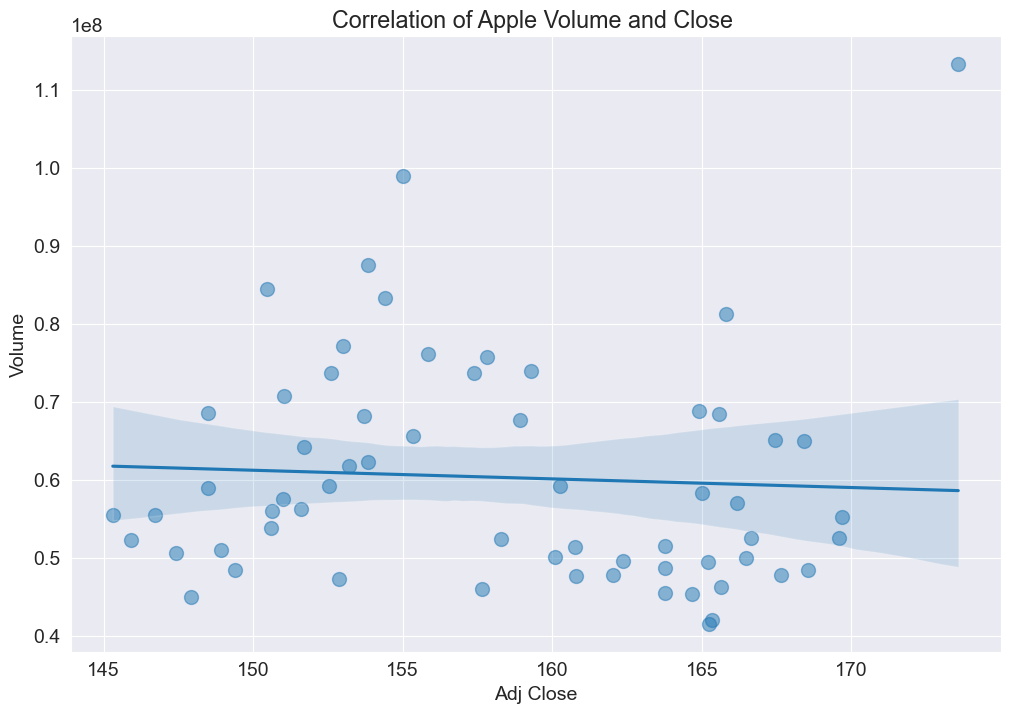

In [230]:
plt.figure(figsize=(12,8))
sns.regplot(x='Adj Close', y='Volume', data=close_volume_apple, scatter_kws={'s':100, 'alpha':0.5})
plt.title('Correlation of Apple Volume and Close ')
plt.show()

In [232]:
close_volume_Microsoft = Microsoft_stock_market.set_index('Date')[['Adj Close','Volume']]
close_volume_Microsoft 

,Adj Close,Volume
Date,,
2023-02-07,266.891510,50841400
2023-02-08,266.063599,54686000
2023-02-09,262.961365,42375100
2023-02-10,262.442657,25818500
2023-02-13,270.642120,44630900
...,...,...
2023-05-01,305.559998,21294100
2023-05-02,305.410004,26404400
2023-05-03,304.399994,22360800


In [234]:
close_volume_Microsoft_corr = close_volume_Microsoft.corr()
close_volume_Microsoft_corr

,Adj Close,Volume
Adj Close,1.00000,0.02671
Volume,0.02671,1.00000


Here the correlation between the volume and the closing price (0.026), which indicates that these two variables tend to move a slight correlation.

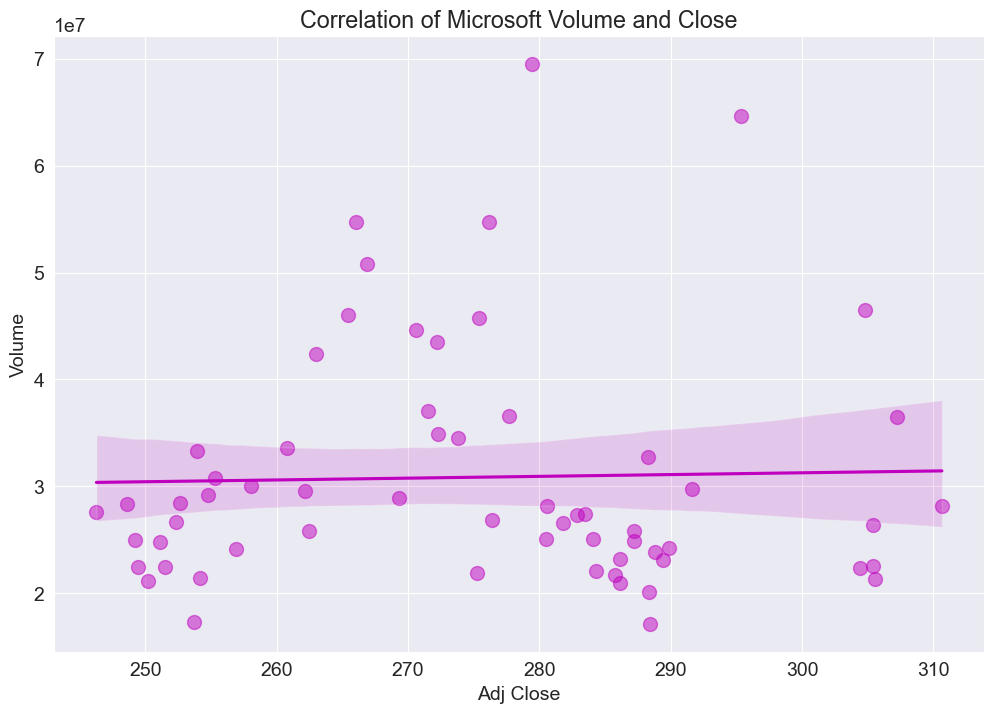

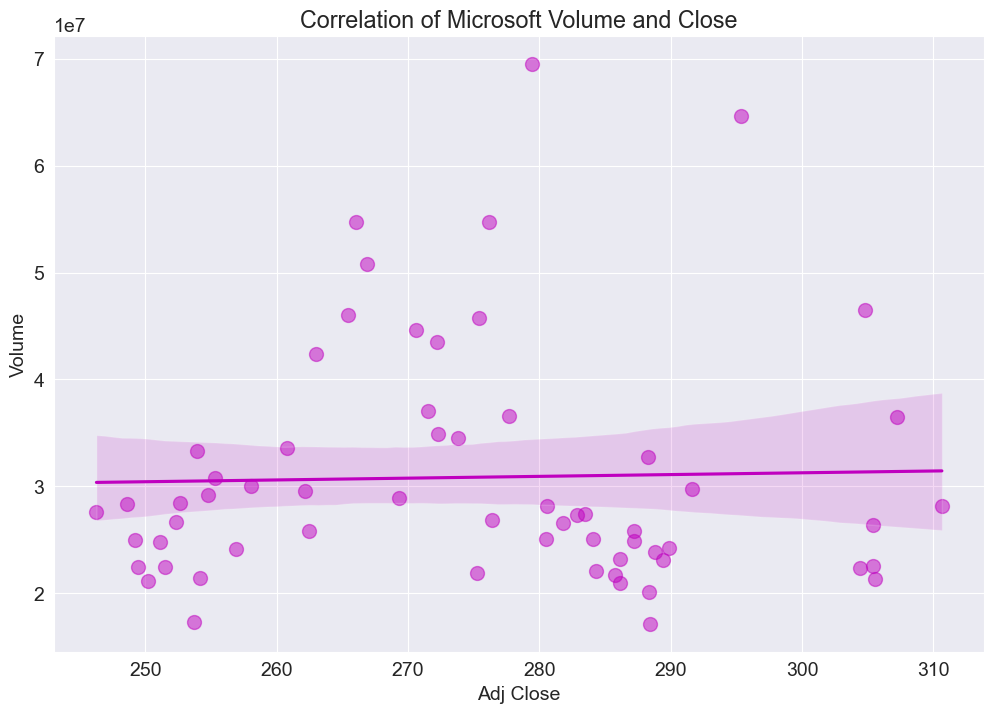

In [241]:
plt.figure(figsize=(12,8))
sns.regplot(x='Adj Close', y='Volume', color='m', data=close_volume_Microsoft, scatter_kws={'s':100, 'alpha':0.5})
plt.title('Correlation of Microsoft Volume and Close')
plt.show()

In [243]:
close_volume_Netflix = Netflix_stock_market.set_index('Date')[['Adj Close','Volume']]
close_volume_Netflix

,Adj Close,Volume
Date,,
2023-02-07,362.950012,6289400
2023-02-08,366.829987,6253200
2023-02-09,362.500000,6901100
2023-02-10,347.359985,7291100
2023-02-13,358.570007,7134400
...,...,...
2023-05-01,324.119995,5341500
2023-05-02,317.549988,4318600
2023-05-03,319.299988,5064100


In [245]:
close_volume_Netflix_corr = close_volume_Netflix.corr()
close_volume_Netflix_corr

,Adj Close,Volume
Adj Close,1.000000,-0.070607
Volume,-0.070607,1.000000


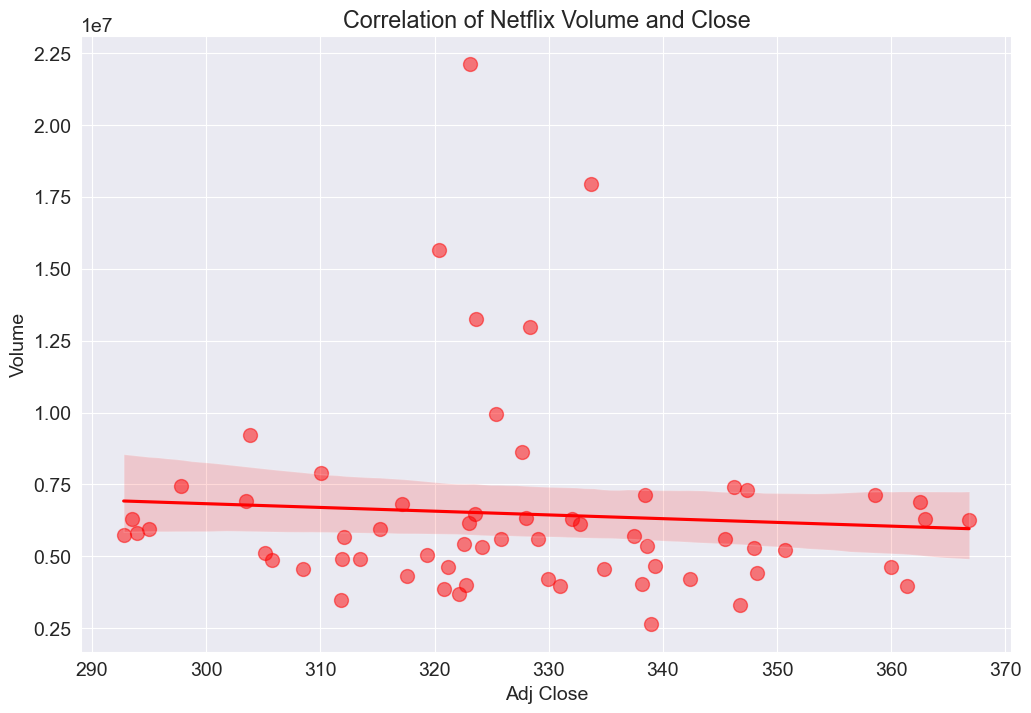

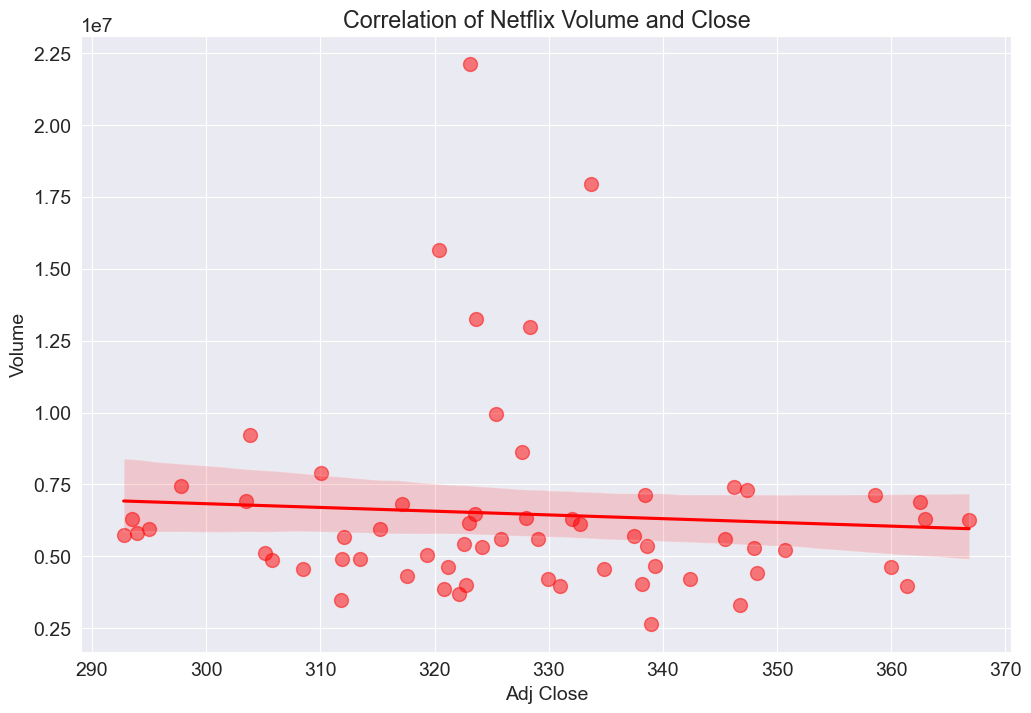

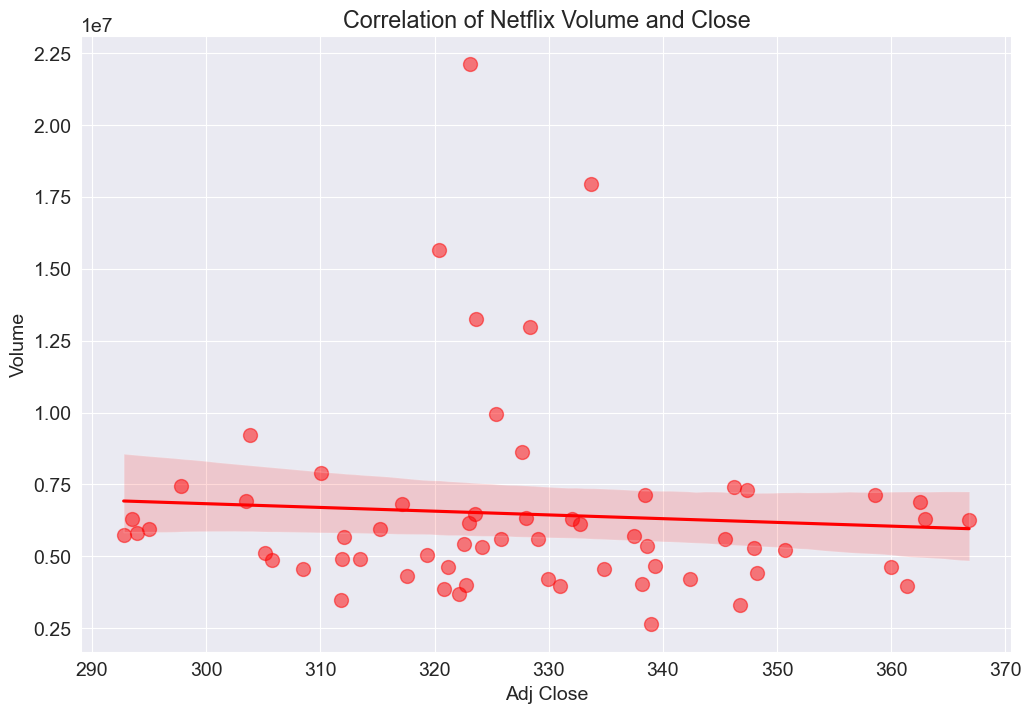

In [251]:
plt.figure(figsize=(12,8))
sns.regplot(x='Adj Close', y='Volume', color='r', data=close_volume_Netflix, scatter_kws={'s':100, 'alpha':0.5})
plt.title('Correlation of Netflix Volume and Close')
plt.show()

In [254]:
close_volume_Google = Google_stock_market.set_index('Date')[['Adj Close','Volume']]
close_volume_Google

,Adj Close,Volume
Date,,
2023-02-07,108.040001,33738800
2023-02-08,100.000000,73546000
2023-02-09,95.459999,97798600
2023-02-10,94.860001,49325300
2023-02-13,95.000000,43116600
...,...,...
2023-05-01,107.709999,20926300
2023-05-02,105.980003,20343100
2023-05-03,106.120003,17116300


In [260]:
close_volume_Google_corr = close_volume_Google.corr()
close_volume_Google_corr

,Adj Close,Volume
Adj Close,1.000000,-0.238777
Volume,-0.238777,1.000000


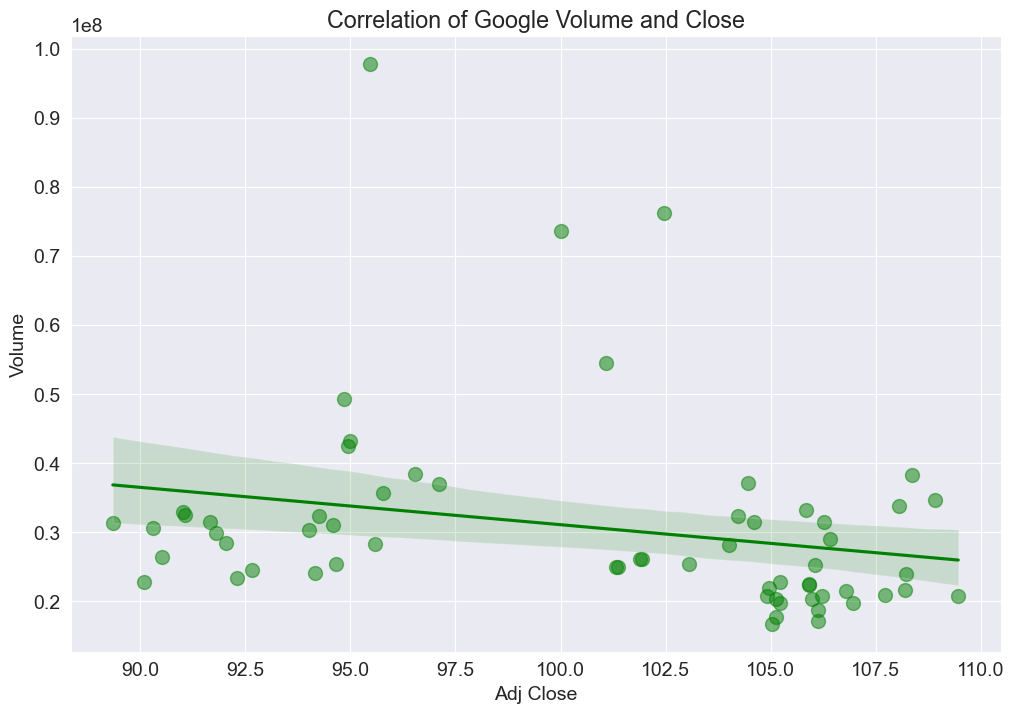

In [262]:
plt.figure(figsize=(12,8))
sns.regplot(x='Adj Close', y='Volume', color='g', data=close_volume_Google, scatter_kws={'s':100, 'alpha':0.5})
plt.title('Correlation of Google Volume and Close')
plt.show()

Although with the search for the correlation between the volume variable and the closing price, it is possible to see the dispersion between the points in the different graphs, evidencing the movement of this correlation between these two variables, however, the regression line does not clearly indicates that the relationship is strongly positive or negative as the movement of the line stays almost horizontal without showing any significant movement, except in the Goggle chart where we can see that the regression line shows a slightly steep slope showing the correlation between the clearly negative variants.

### What has been the change in the daily and monthly price of the shares of Apple, Microsoft, Netflix and Google?

To do this, we will first calculate the percentage change of the previous Adj Close row with respect to the following by default, creating a new column that we will call 'Daily price change'. This is useful for comparing the percentage change in a time series of items.

For this we can use the formula df['Adj close'] /df['Adj close'].shift(1) , or use the ptc.change(1) function.

So let's take the monthly average of 'Daily Price Change' and group it by month.

In [274]:
Daily_Return = Apple_stock_market['Adj Close'].pct_change(1)
A_stock_market = Apple_stock_market.copy()
A_stock_market['Daily Price Change'] =Daily_Return
A_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday,Daily Price Change
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2023,Feb,7,1,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2023,Feb,8,2,-0.017653
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2023,Feb,9,3,-0.006912
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2023,Feb,10,4,0.002456
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2023,Feb,13,0,0.018807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,AAPL,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,2023,May,1,0,-0.000530
58,AAPL,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,2023,May,2,1,-0.006191
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,2023,May,3,2,-0.006467
60,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400,2023,May,4,3,-0.009913


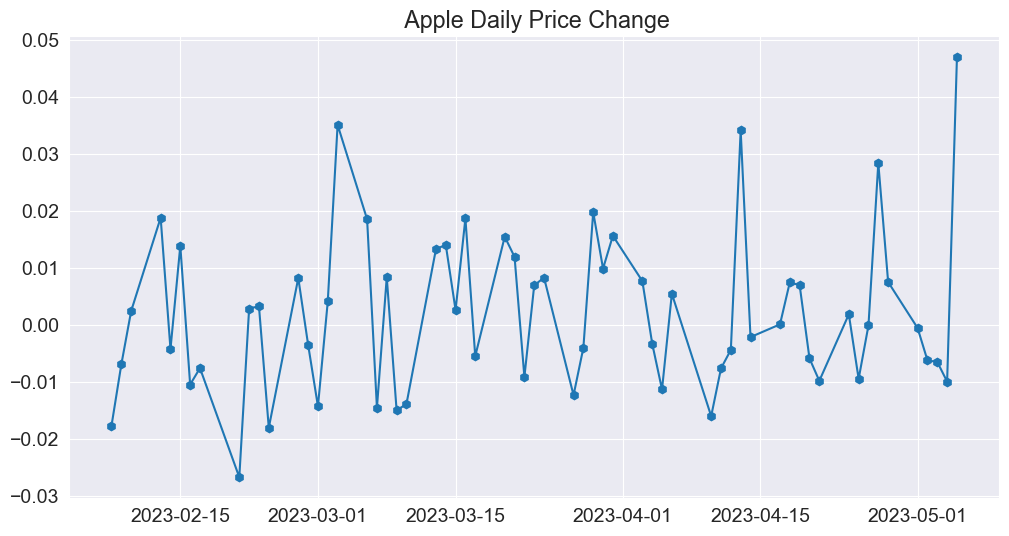

In [276]:
plt.figure(figsize=(12,6))
plt.plot(A_stock_market['Date'], A_stock_market['Daily Price Change'], marker='h')
plt.title(' Apple Daily Price Change')
plt.show()

In [278]:
Apple_month_price_change = A_stock_market.groupby('month')[['Daily Price Change']].mean()
A_month_price_change = Apple_month_price_change.rename(columns={'Daily Price Change':'Monthly_Price_Change'})
A_month_price_change

,Monthly_Price_Change
month,
Apr,0.001580
Feb,-0.003236
Mar,0.004977
May,0.004765


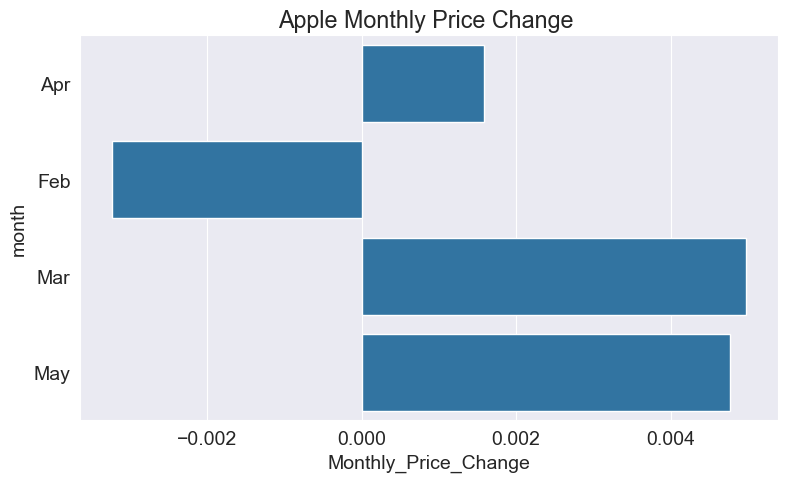

In [280]:
plt.title('Apple Monthly Price Change ')
sns.barplot(x=A_month_price_change.Monthly_Price_Change, y=A_month_price_change.index)
plt.show()

In [282]:
M_stock_market = Microsoft_stock_market.copy()
M_daily_Return = M_stock_market['Adj Close'].pct_change(1)
M_stock_market['Daily Price Change'] = M_daily_Return
M_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday,Daily Price Change
62,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,2023,Feb,7,1,NaN
63,MSFT,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000,2023,Feb,8,2,-0.003102
64,MSFT,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100,2023,Feb,9,3,-0.011660
65,MSFT,2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25818500,2023,Feb,10,4,-0.001973
66,MSFT,2023-02-13,267.640015,274.600006,267.149994,271.320007,270.642120,44630900,2023,Feb,13,0,0.031243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,MSFT,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100,2023,May,1,0,-0.005533
120,MSFT,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400,2023,May,2,1,-0.000491
121,MSFT,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800,2023,May,3,2,-0.003307
122,MSFT,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900,2023,May,4,3,0.003318


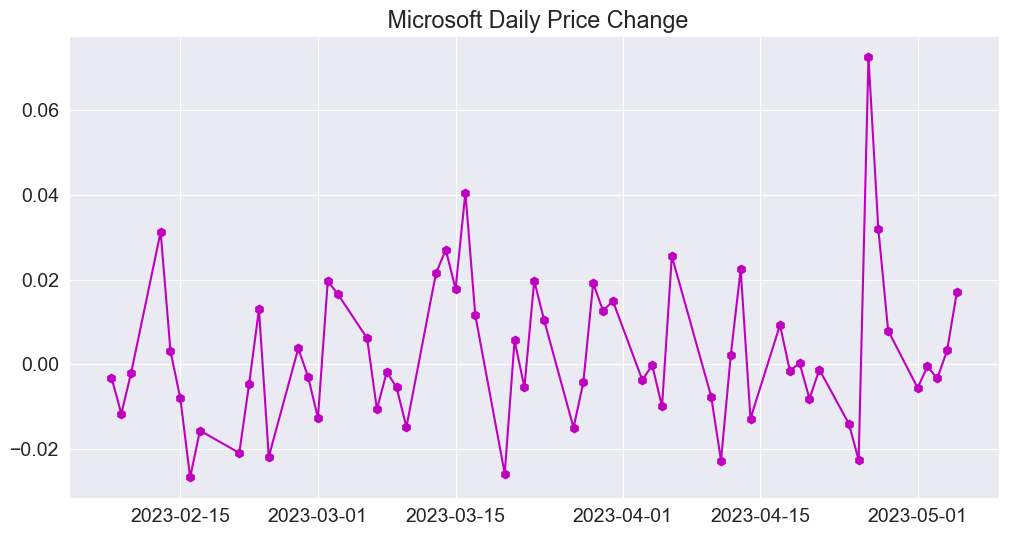

In [284]:
plt.figure(figsize=(12,6))
plt.plot(M_stock_market['Date'], M_stock_market['Daily Price Change'], marker='h', color='m')
plt.title(' Microsoft Daily Price Change')
plt.show()

In [286]:
Microsoft_month_price_change = M_stock_market.groupby('month')[['Daily Price Change']].mean()
M_month_price_change = Microsoft_month_price_change.rename(columns={'Daily Price Change':'Monthly_Price_Change'})
M_month_price_change

,Monthly_Price_Change
month,
Apr,0.003587
Feb,-0.004719
Mar,0.006443
May,0.002229


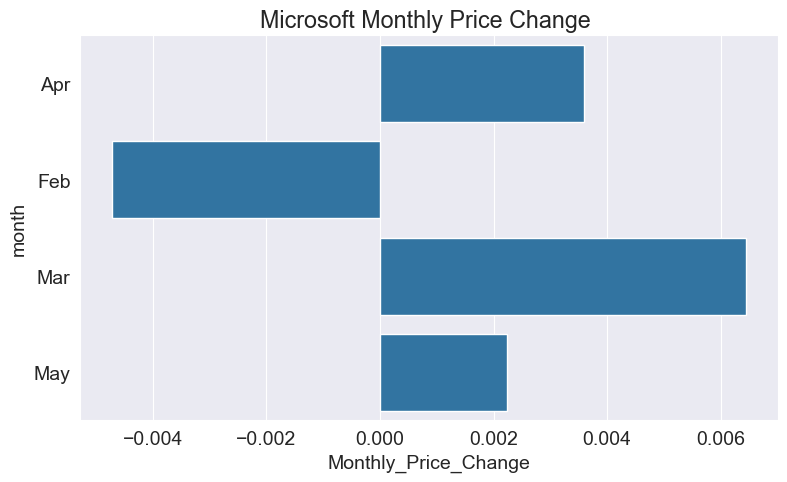

In [288]:
plt.title('Microsoft Monthly Price Change ')
sns.barplot(x=M_month_price_change.Monthly_Price_Change, y=M_month_price_change.index)
plt.show()

In [290]:
N_stock_market = Netflix_stock_market.copy()
N_daily_Return = N_stock_market['Adj Close'].pct_change(1)
N_stock_market['Daily Price Change'] = N_daily_Return
+N
_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday,Daily Price Change
124,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,2023,Feb,7,1,NaN
125,NFLX,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200,2023,Feb,8,2,0.010690
126,NFLX,2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100,2023,Feb,9,3,-0.011804
127,NFLX,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100,2023,Feb,10,4,-0.041766
128,NFLX,2023-02-13,349.500000,359.700012,344.250000,358.570007,358.570007,7134400,2023,Feb,13,0,0.032272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500,2023,May,1,0,-0.017610
182,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600,2023,May,2,1,-0.020270
183,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100,2023,May,3,2,0.005511
184,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,2023,May,4,3,0.004635


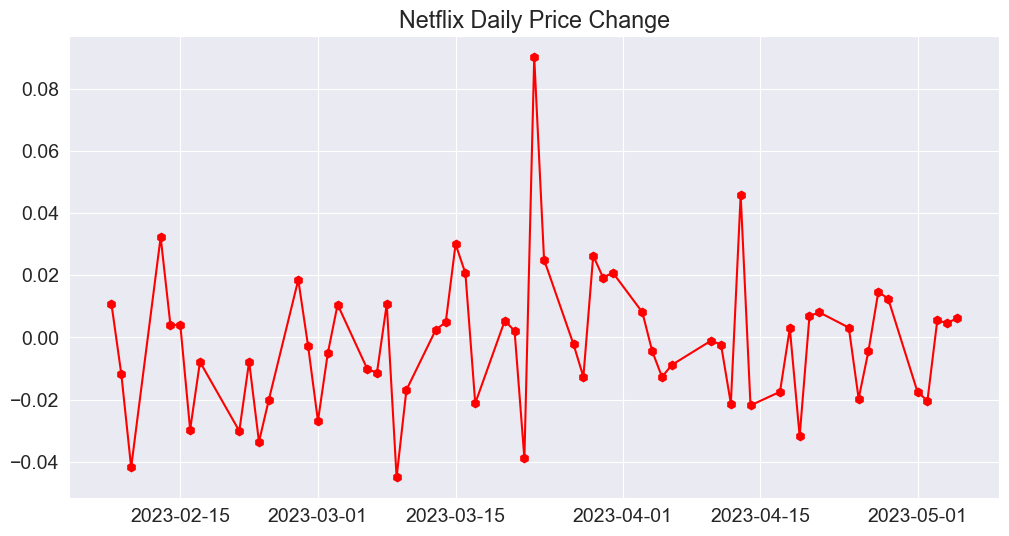

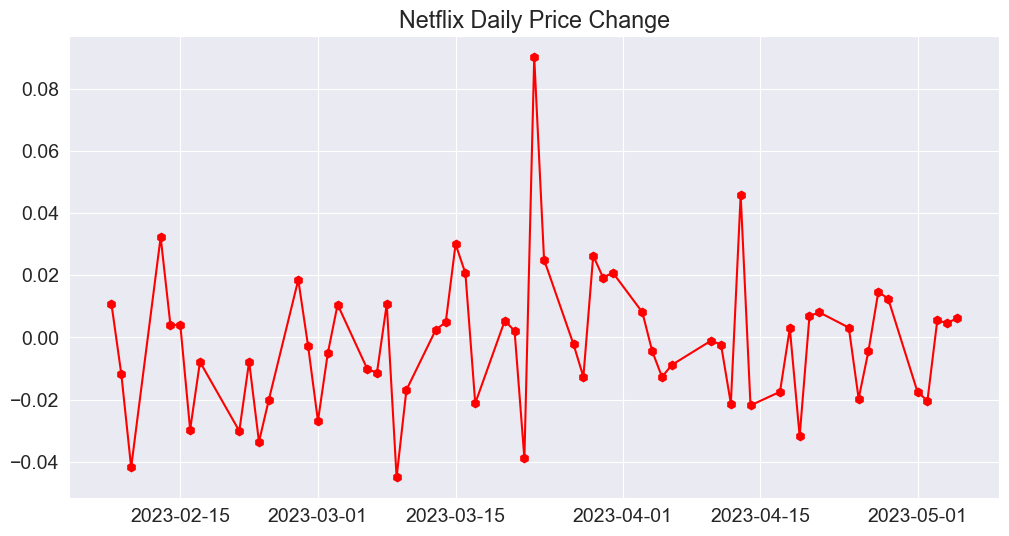

In [294]:
plt.figure(figsize=(12,6))
plt.plot(N_stock_market['Date'], N_stock_market['Daily Price Change'], marker='h', color='r')
plt.title('Netflix Daily Price Change')
plt.show()

In [296]:
Netflix_month_price_change = N_stock_market.groupby('month')[['Daily Price Change']].mean()
N_month_price_change = Netflix_month_price_change.rename(columns={'Daily Price Change':'Monthly_Price_Change'})
N_month_price_change

,Monthly_Price_Change
month,
Apr,-0.002278
Feb,-0.008274
Mar,0.003409
May,-0.004312


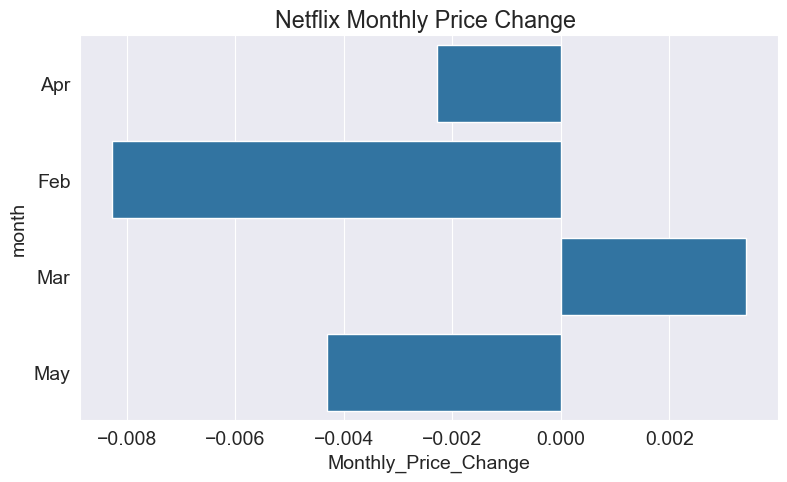

In [298]:
plt.title('Netflix Monthly Price Change ')
sns.barplot(x=N_month_price_change.Monthly_Price_Change, y=N_month_price_change.index)
plt.show()

In [300]:
G_stock_market = Google_stock_market.copy()
G_daily_Return = G_stock_market['Adj Close'].pct_change(1)
G_stock_market['Daily Price Change'] = G_daily_Return
G_stock_market

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday,Daily Price Change
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,2023,Feb,7,1,NaN
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,2023,Feb,8,2,-0.074417
188,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,2023,Feb,9,3,-0.045400
189,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300,2023,Feb,10,4,-0.006285
190,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,2023,Feb,13,0,0.001476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,2023,May,1,0,-0.004713
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,2023,May,2,1,-0.016062
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,2023,May,3,2,0.001321
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,2023,May,4,3,-0.008575


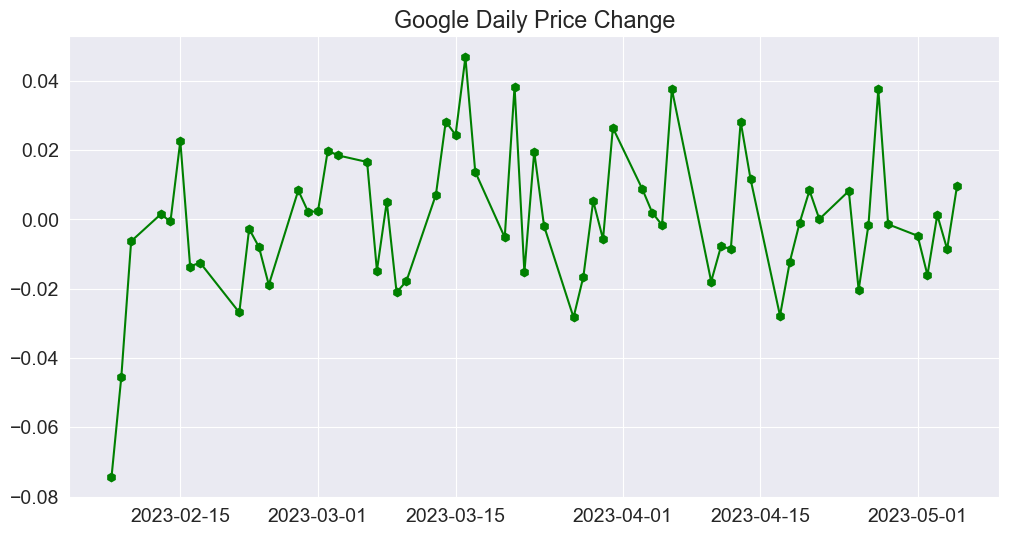

In [302]:
plt.figure(figsize=(12,6))
plt.plot(G_stock_market['Date'], G_stock_market['Daily Price Change'], marker='h', color='g')
plt.title('Google Daily Price Change')
plt.show()

In this graph of the daily movement of Google, as we can see, although there was some movement, the price had its lowest negative displacement in the month of February, reaching a recovery reaching its highest point in the month of March

In [308]:
Google_month_price_change = G_stock_market.groupby('month')[['Daily Price Change']].mean()
G_month_price_change = Google_month_price_change.rename(columns={'Daily Price Change':'Monthly_Price_Change'})
G_month_price_change

,Monthly_Price_Change
month,
Apr,0.002244
Feb,-0.012452
Mar,0.006352
May,-0.003695


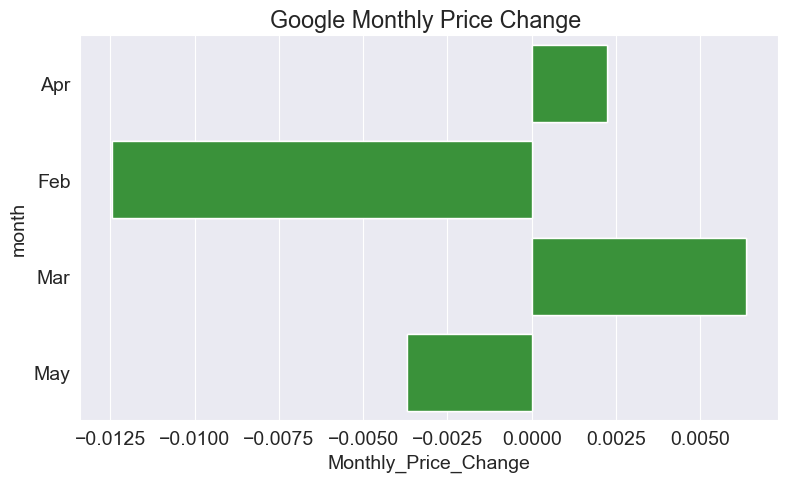

In [321]:
plt.title('Google Monthly Price Change ')
sns.barplot(x=G_month_price_change.Monthly_Price_Change, y=G_month_price_change.index)
plt.show()

n this graph of the monthly average movement of the price of Google's shares, we can see a similar behavior in the others, having its only month with negative movement in February, with its price reaching its highest point in the month of March.

Although the daily charts are where there was more movement in the price in the monthly charts, we could see that in all of them the price moved in a very similar way, with the month of February being negative on average and the month where the price was It had its biggest positive movement in March.

### What was the correlation between the daily movements of different stocks?

As we could see in the last point, the change in the price movement showed a very similar behavior in all of the prices of the shares of all the companies in this data set, so we have to investigate how much the correlation of the change is of the price between the price of the shares of the different companies.

In [330]:
a= A_stock_market[['Date','Daily Price Change']]
ar = a.rename(columns={'Daily Price Change': 'Apple Price Change'}) 

m= M_stock_market[['Date', 'Daily Price Change']]
mr = m.rename(columns={'Daily Price Change': ' Microsoft Price Change'})
ms = mr.merge(ar, on='Date')

n = N_stock_market[['Date','Daily Price Change']]
nr = n.rename(columns={'Daily Price Change': 'Netflix Price Change'})
nst = nr.merge(ms, on='Date')

g = G_stock_market[['Date','Daily Price Change']]
gr = g.rename(columns={'Daily Price Change': 'Google Price Change'})
Price_Change = gr.merge(nst, on='Date')
Price_Change

,Date,Google Price Change,Netflix Price Change,Microsoft Price Change,Apple Price Change
0,2023-02-07,NaN,NaN,NaN,NaN
1,2023-02-08,-0.074417,0.010690,-0.003102,-0.017653
2,2023-02-09,-0.045400,-0.011804,-0.011660,-0.006912
3,2023-02-10,-0.006285,-0.041766,-0.001973,0.002456
4,2023-02-13,0.001476,0.032272,0.031243,0.018807
...,...,...,...,...,...
57,2023-05-01,-0.004713,-0.017610,-0.005533,-0.000530
58,2023-05-02,-0.016062,-0.020270,-0.000491,-0.006191
59,2023-05-03,0.001321,0.005511,-0.003307,-0.006467
60,2023-05-04,-0.008575,0.004635,0.003318,-0.009913


In [332]:
Price_Change.corr(method='pearson')

,Date,Google Price Change,Netflix Price Change,Microsoft Price Change,Apple Price Change
Date,1.000000,0.171986,0.111700,0.154365,0.141449
Google Price Change,0.171986,1.000000,0.404993,0.519952,0.643915
Netflix Price Change,0.111700,0.404993,1.000000,0.433438,0.504883
Microsoft Price Change,0.154365,0.519952,0.433438,1.000000,0.571068
Apple Price Change,0.141449,0.643915,0.504883,0.571068,1.000000


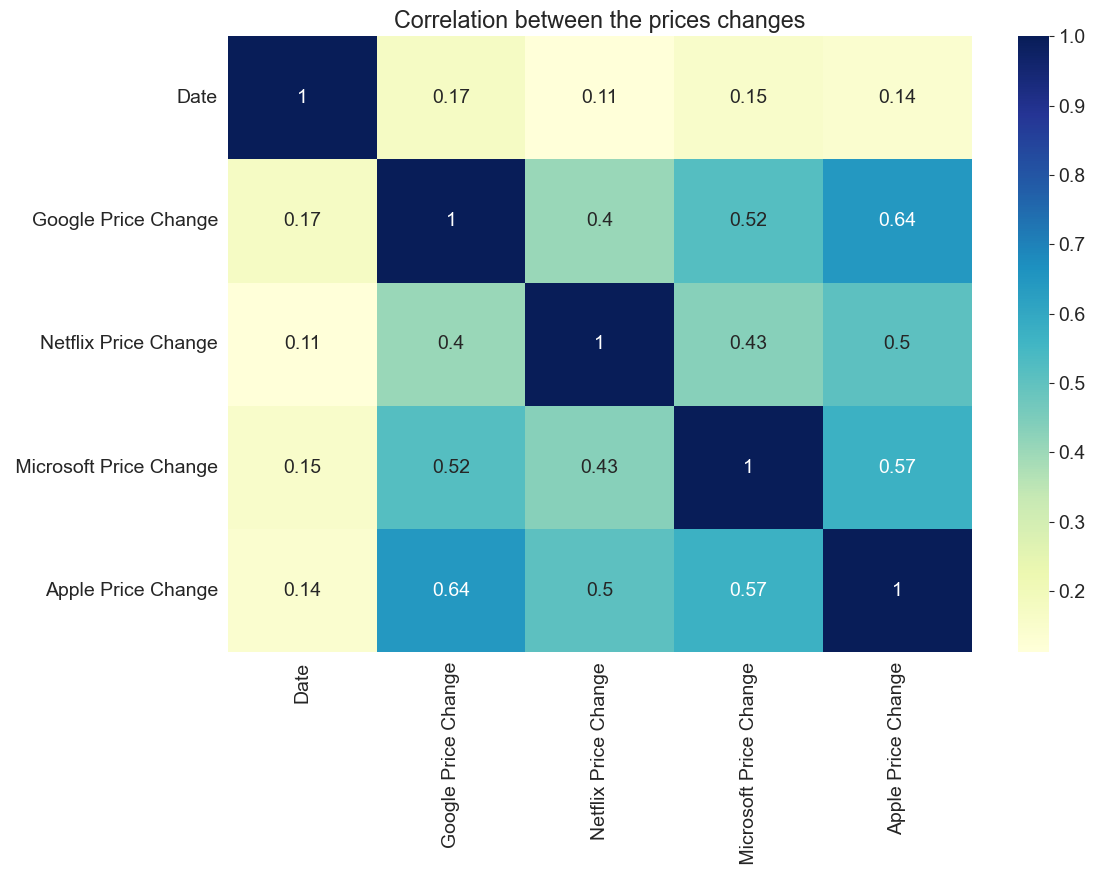

In [334]:
plt.figure(figsize=(12,8))
plt.title('Correlation between the prices changes')
sns.heatmap(Price_Change.corr(method='pearson'), annot=True, cmap='YlGnBu')
plt.show()

### What has been the level of volatility in the stock prices of Apple, Microsoft, Netflix, and Google?

In [337]:
A_stock_market_std = A_stock_market[['Date', 'Daily Price Change']].copy()
A_stock_market_std['SMA for 5 days'] = Daily_Return.rolling(window=5, min_periods=5).std()
A_stock_market_std

,Date,Daily Price Change,SMA for 5 days
0,2023-02-07,NaN,NaN
1,2023-02-08,-0.017653,NaN
2,2023-02-09,-0.006912,NaN
3,2023-02-10,0.002456,NaN
4,2023-02-13,0.018807,NaN
...,...,...,...
57,2023-05-01,-0.000530,0.014302
58,2023-05-02,-0.006191,0.013526
59,2023-05-03,-0.006467,0.014492
60,2023-05-04,-0.009913,0.006840


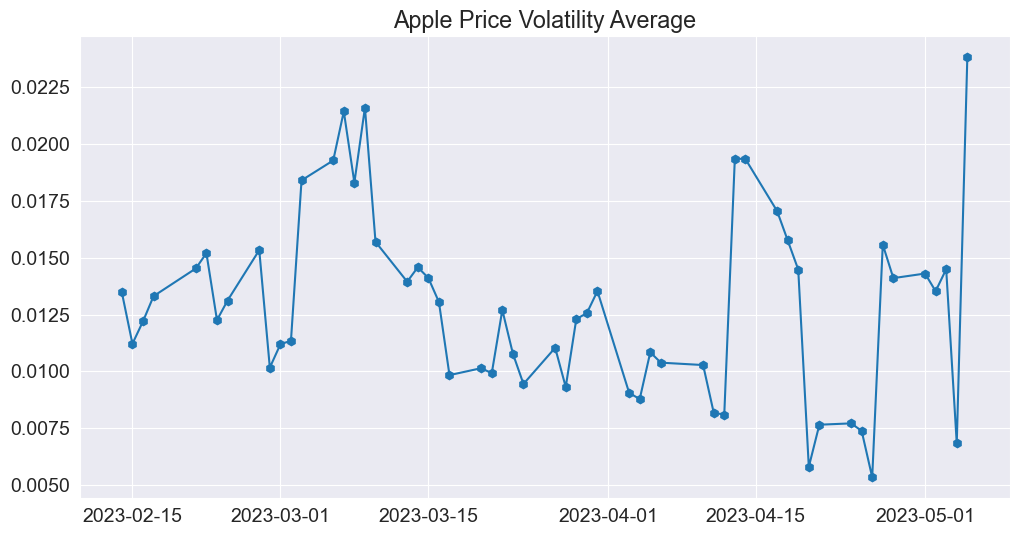

In [339]:
plt.figure(figsize=(12,6))
plt.plot(A_stock_market_std['Date'], A_stock_market_std['SMA for 5 days'], marker='h')
plt.title('Apple Price Volatility Average')
plt.show()

As we can see in this graph, the months with the greatest volatility in the price of Apple in the market were March and from the second half of April until in the first days of May the price presented a large upward movement. I feel the period from the second half of April to the month of May where volatility was higher.

We continue with the same process in the other companies in the data frame.

In [345]:
M_stock_market_std = M_stock_market[['Date', 'Daily Price Change']].copy()
M_stock_market_std['SMA for 5 days'] = M_daily_Return.rolling(window=5, min_periods=5).std()
M_stock_market_std

,Date,Daily Price Change,SMA for 5 days
62,2023-02-07,NaN,NaN
63,2023-02-08,-0.003102,NaN
64,2023-02-09,-0.011660,NaN
65,2023-02-10,-0.001973,NaN
66,2023-02-13,0.031243,NaN
...,...,...,...
119,2023-05-01,-0.005533,0.036916
120,2023-05-02,-0.000491,0.032025
121,2023-05-03,-0.003307,0.015354
122,2023-05-04,0.003318,0.005375


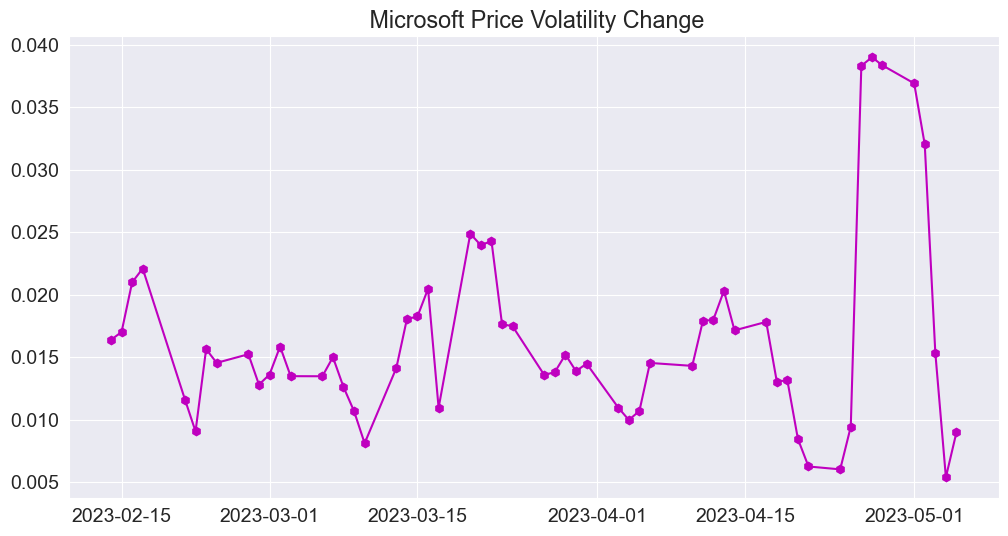

In [347]:
plt.figure(figsize=(12,6))
plt.plot(M_stock_market_std['Date'], M_stock_market_std['SMA for 5 days'], marker='h', color='m')
plt.title(' Microsoft Price Volatility Change')
plt.show()

In [349]:
N_stock_market_std = N_stock_market[['Date', 'Daily Price Change']].copy()
N_stock_market_std['SMA for 5 days'] = N_daily_Return.rolling(window=5, min_periods=5).std()
N_stock_market_std

,Date,Daily Price Change,SMA for 5 days
124,2023-02-07,NaN,NaN
125,2023-02-08,0.010690,NaN
126,2023-02-09,-0.011804,NaN
127,2023-02-10,-0.041766,NaN
128,2023-02-13,0.032272,NaN
...,...,...,...
181,2023-05-01,-0.017610,0.016162
182,2023-05-02,-0.020270,0.016320
183,2023-05-03,0.005511,0.016710
184,2023-05-04,0.004635,0.014860


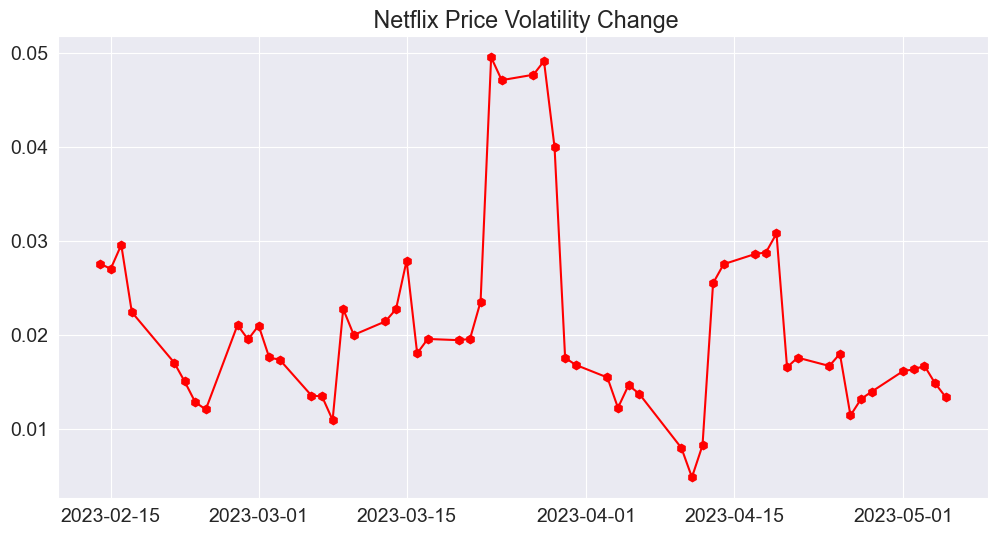

In [351]:
plt.figure(figsize=(12,6))
plt.plot(N_stock_market_std['Date'], N_stock_market_std['SMA for 5 days'], marker='h', color='r')
plt.title(' Netflix Price Volatility Change')
plt.show()

In [353]:
G_stock_market_std = G_stock_market[['Date', 'Daily Price Change']].copy()
G_stock_market_std['SMA for 5 days'] = G_daily_Return.rolling(window=5, min_periods=5).std()
G_stock_market_std

,Date,Daily Price Change,SMA for 5 days
186,2023-02-07,NaN,NaN
187,2023-02-08,-0.074417,NaN
188,2023-02-09,-0.045400,NaN
189,2023-02-10,-0.006285,NaN
190,2023-02-13,0.001476,NaN
...,...,...,...
243,2023-05-01,-0.004713,0.021387
244,2023-05-02,-0.016062,0.020338
245,2023-05-03,0.001321,0.020228
246,2023-05-04,-0.008575,0.006789


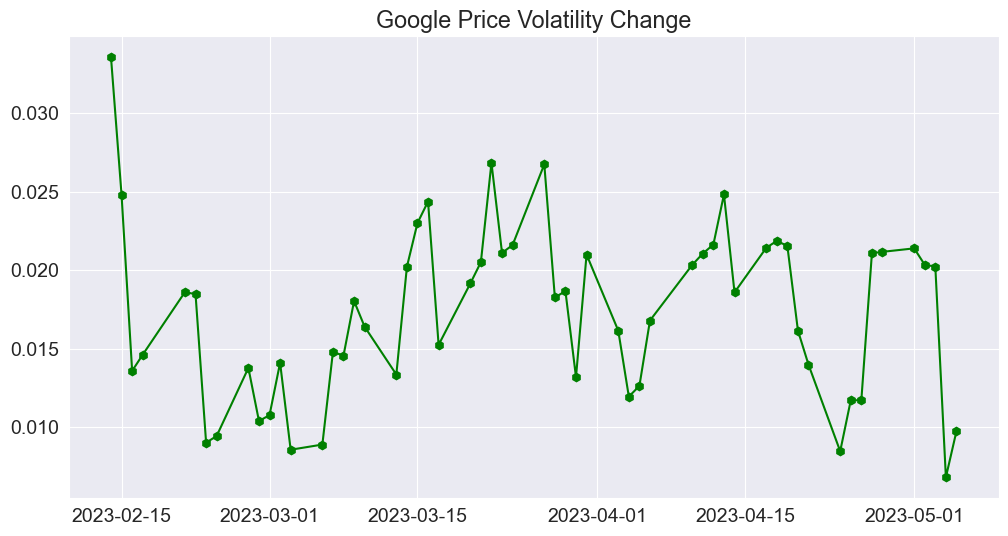

In [355]:
plt.figure(figsize=(12,6))
plt.plot(G_stock_market_std['Date'], G_stock_market_std['SMA for 5 days'], marker='h', color='g')
plt.title('Google Price Volatility Change')
plt.show()

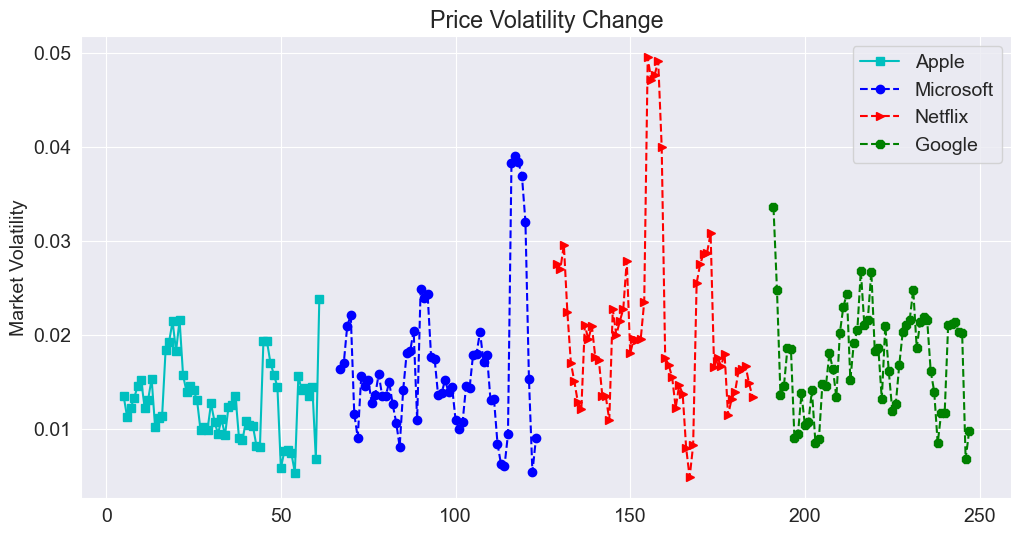

In [357]:
plt.figure(figsize=(12,6))
A_stock_market_std['SMA for 5 days'].plot(marker='s', c='c', ls='-')
M_stock_market_std['SMA for 5 days'] .plot(marker='o', c='b', ls='--')
N_stock_market_std['SMA for 5 days'].plot(marker='>', c='r', ls='--')
G_stock_market_std['SMA for 5 days'].plot(marker='8', c='g', ls='--')

plt.title('Price Volatility Change')
plt.ylabel('Market Volatility')
plt.legend(['Apple', 'Microsoft', 'Netflix','Google' ])
plt.show()

As we can see, it was Netflix followed by Microsoft that showed the highest volatility in its share price, with Apple showing the least volatility.

### Inferences and Conclusion

+In this dataset, the data on the behavior of the shares of the companies Apple, Microsoft, Netflix, and Google from February to May of the year 2023 was presented. After the analysis of the composition of this dataset in an analysis, we can infer some conclusions:

Taking into account the indicator of the average movement, taking as a starting point the behavior of the price in the first months, the companies that presented the greatest opportunity to open long operations taking advantage of the upward movement of the share price were Apple, Microsoft, and Google mainly in from the month of March.

While Netflix presented a good opportunity to open a short operation mainly in the first quarter of the year, to then present a purchase opportunity in the first half of March up to the price of approximately 340 where it broke its resistance point.

This analysis takes into account that the use of the moving average is used as a tool to measure the possible support and resistance points in the price fluctuation, being able to indicate possibilities of operating short (selling) or long (buying).

The behavior of the price of the shares that showed the highest level of correlation taking into account the closing price were Apple with Microsoft followed by Google with Microsoft, indicating that having this correlation it is good to combine the portfolio with share titles that are not correlated to be able to make a balance, such as Netflix, which showed the least correlation with the others.


Regarding the correlation of the closing price and the volume, Apple, Google, and Netflix showed a negative correlation, which, excepting Microsoft, which was the only one that presented a slightly positive correlation, indicates that the volume of operation was not correlated as enough to indicate the possible movement of the price, however the volume is a good indicator so that combined with the fluctuation of the price to be able to identify buying or selling possibilities.

Taking into account the movement of the daily and monthly price, all the companies analyzed in this dataset all showed a negative movement in the price of their shares in the month of February, and that is wonderful with some spikes that Apple and Microsoft were able to achieve in the In the month of May and Netflix in March, the price remained relatively within the specific range, being precisely the latter (Netflix) the one that presented the worst performance on average, since expanding in the month of March, every month presented a negative average.

In the correlation of the variation between the share prices of the companies analyzed in this dataset, it was Apple with Google that presented the highest level of correlation, being again Netflix the one that presented the least correlation, largely coinciding with the analysis of the correlation of the closing price.

Correlation analysis is good for making decisions on which company stocks to mix into your portfolio, so after looking at how much the closing price correlation and the price change correlation analysis both Apple , Microsoft and Google are the ones with the highest correlation, and Netflix the one with the least correlation.

ow, if we take volatility into account, it was Netflix and Microsoft that presented the highest level of volatility and therefore presenting a greater opportunity to speculate with the price to open and close both short and long operations in a short period of time, Thus, being able to maximize the possibility of obtaining profits but at a high level of risk. Observation: these data analyzed taking into account the average of the opening price and the closing price, the volume, the variation and the price fluctuation would be of more interest to speculative investors who invest in the short term, since those who invest in value and It maintains the action purchase operation over time (years included). Its analysis would not be restricted only to the price action but would take more into account the different elements of the economy for a fundamental analysis.